## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [2]:
df= boston_features
boston_cont = df[df.columns.drop(list(df.filter(regex='TAX')))]
boston_cont = boston_cont[boston_cont.columns.drop(list(boston_cont.filter(regex='RAD')))]
boston_cont= boston_cont.drop(['CHAS'], axis=1)

boston_cont.hist(figsize  = [8, 8]);

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

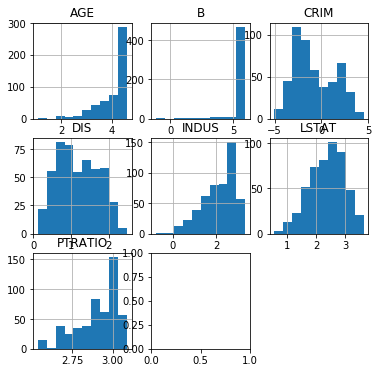

In [3]:
import numpy as np

boston_log = pd.DataFrame([])
boston_log['AGE'] = np.log(boston_cont['AGE'])
boston_log['B'] = np.log(boston_cont['B'])
boston_log['CRIM'] = np.log(boston_cont['CRIM'])
boston_log['DIS'] = np.log(boston_cont['DIS'])
boston_log['INDUS'] = np.log(boston_cont['INDUS'])
boston_log['LSTAT'] = np.log(boston_cont['LSTAT'])
boston_log['PTRATIO'] = np.log(boston_cont['PTRATIO'])
boston_log['ZN'] = np.log(boston_cont['ZN'])
boston_log.hist(figsize  = [6, 6]);

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

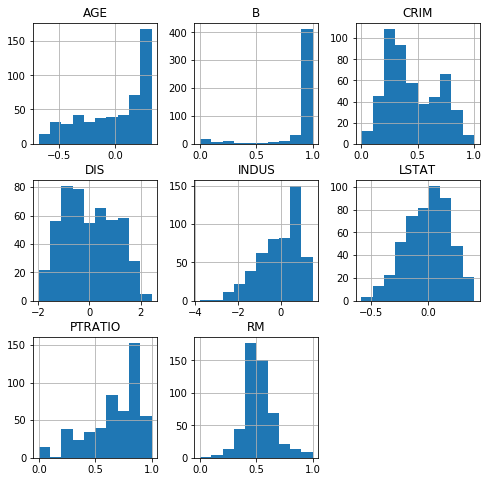

In [4]:
# dropped ZN - cumbersome to work with and don't know enough transformations yet

rm = boston_cont['RM'] # this was already well distributed 
age = boston_cont['AGE']
b = boston_cont['B']
# kept age and b non-log because the log transformation did not improve skewness
logcrim = boston_log["CRIM"] 
logdis = boston_log["DIS"]  
logindus = boston_log["INDUS"] 
loglstat = boston_log["LSTAT"]
logptratio = boston_log["PTRATIO"]


scaled_rm = (rm-min(rm))/(max(rm)-min(rm)) # min-max
scaled_age = (age-np.mean(age))/(max(age)-min(age)) # mean norm
scaled_b = (b-min(b))/(max(b)-min(b)) # min-max
scaled_crim = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim)) # min-max
scaled_dis = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis)) # standardization
scaled_indus = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus)) # standardization
scaled_lstat = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat)) # mean norm
scaled_ptratio = (logptratio-min(logptratio))/(max(logptratio)-min(logptratio)) # min-max

features_final = pd.DataFrame([])
features_final['RM'] = scaled_rm
features_final['AGE'] = scaled_age
features_final['B'] = scaled_b
features_final['CRIM'] = scaled_crim
features_final['DIS'] = scaled_dis
features_final['INDUS'] = scaled_indus
features_final['LSTAT'] = scaled_lstat
features_final['PTRATIO'] = scaled_ptratio
features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.